In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
  
clock_2 = pd.read_csv("Data/Clock_Callibration_1.txt", sep = "	")
clock_4 = pd.read_csv("Data/Clock_Callibration_4.txt", sep = "	")
clock_8 = pd.read_csv("Data/Clock_Callibration_8.txt", sep = "	")
clock_16 = pd.read_csv("Data/Clock_Callibration_16.txt", sep = "	")
clock_32 = pd.read_csv("Data/Clock_Callibration_32.txt", sep = "	")
clock_39 = pd.read_csv("Data/Clock_Callibration_39.txt", sep = "	")

for col in clock_2.columns:
    print(col)

FileNotFoundError: [Errno 2] No such file or directory: 'Data/Clock_Callibration_1.txt'

In [2]:
clock_2

,Ch0_time1,Ch0_amp1(V),Ch0_width1 (s),Ch0_time2,Ch0_amp2 (V),Ch0_width2 (s),Ch1_time1(s),Ch1_amp1 (V),Ch1_width1 (s),Ch1_time2 (s),Ch1_amp2 (V),Ch1_width2 (s)
0,0.000005,0.328362,1.001826e-07,0.000008,0.367517,1.029213e-07,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000005,0.327641,9.986208e-08,0.000008,0.368875,1.027111e-07,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000005,0.327204,1.002890e-07,0.000008,0.368034,1.033971e-07,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000005,0.326785,1.001914e-07,0.000008,0.363687,1.029283e-07,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000005,0.323183,1.000695e-07,0.000008,0.368148,1.030929e-07,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8111,0.000005,0.326515,9.987010e-08,0.000008,0.363935,1.025753e-07,0.0,0.0,0.0,0.0,0.0,0.0
8112,0.000005,0.324797,1.000372e-07,0.000008,0.368180,1.025883e-07,0.0,0.0,0.0,0.0,0.0,0.0
8113,0.000005,0.326727,1.002074e-07,0.000008,0.369531,1.033286e-07,0.0,0.0,0.0,0.0,0.0,0.0
8114,0.000005,0.326624,1.003335e-07,0.000008,0.369747,1.026097e-07,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
delay_2 = clock_2.Ch0_time2 - clock_2.Ch0_time1
delay_4 = clock_4.Ch0_time2 - clock_4.Ch0_time1
delay_8 = clock_8.Ch0_time2 - clock_8.Ch0_time1
delay_16 = clock_16.Ch0_time2 - clock_16.Ch0_time1
delay_32 = clock_32.Ch0_time2 - clock_32.Ch0_time1

In [4]:
delay_32

0       0.000033
1       0.000033
2       0.000033
3       0.000033
4       0.000033
          ...   
8201    0.000033
8202    0.000033
8203    0.000033
8204    0.000033
8205    0.000033
Length: 8206, dtype: float64

Slope: 1.0000040604182157 pm 1.9674308356939768e-06
Intercept: 1.0937592100810918 pm 3.249538275872028e-05


Text(0, 0.5, 'Measures Delay in Microseconds')

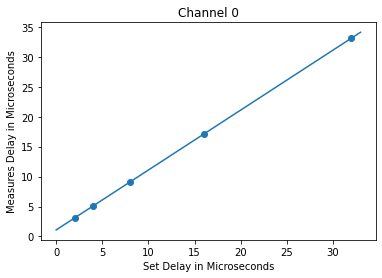

In [37]:
x = [2,4,8,16,32]
y = 1e6 * np.array([np.mean(delay_2), np.mean(delay_4), np.mean(delay_8), np.mean(delay_16), np.mean(delay_32)])
plt.scatter(x, y)
p, cov = np.polyfit([2,4,8,16,32], 1e6 * np.array([np.mean(delay_2), np.mean(delay_4), np.mean(delay_8), np.mean(delay_16), np.mean(delay_32)]), deg = 1, cov = True)
plt.plot(np.linspace(0,33), p[0]*np.linspace(0,33) + p[1])
print(f"Slope: {p[0]} pm {np.sqrt(cov[0][0])}")
print(f"Intercept: {p[1]} pm {np.sqrt(cov[1][1])}")
plt.title('Channel 0')
plt.xlabel('Set Delay in Microseconds')
plt.ylabel('Measures Delay in Microseconds')

In [38]:
print(x)
print(y)

[2, 4, 8, 16, 32]
[ 3.09380237  5.09379986  9.09375462 17.09377138 33.09391957]


In [61]:
#looking at linearity
lin_1 = pd.read_csv("Linearity_1_final.txt", sep = "	")
lin_2 = pd.read_csv("Linearity_2_final.txt", sep = "	")
lin_3 = pd.read_csv("Linearity_3_final.txt", sep = "	")
lin_4 = pd.read_csv("Linearity_4_final.txt", sep = "	")
lin_5 = pd.read_csv("Linearity_5_final.txt", sep = "	")

amp_ch0 = np.array([np.mean(lin_1.Ch0_amp1), np.mean(lin_2.Ch0_amp1), np.mean(lin_3.Ch0_amp1), np.mean(lin_4.Ch0_amp1), np.mean(lin_5.Ch0_amp1)])
amp_ch1 = np.array([np.mean(lin_1.Ch1_amp1), np.mean(lin_2.Ch1_amp1), np.mean(lin_3.Ch1_amp1), np.mean(lin_4.Ch1_amp1), np.mean(lin_5.Ch1_amp1)])

Slope: 0.9523384187834644 pm 0.00018175406150943728


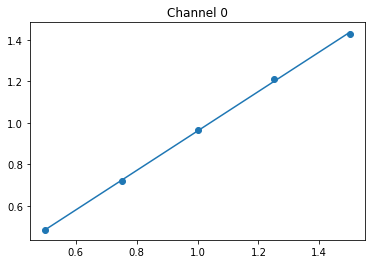

Slope: 0.9248946163006726 pm 0.007996216867633636


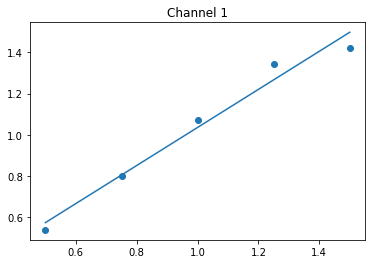

In [69]:
x = np.array([0.5,0.75,1,1.25,1.5])
plt.scatter(x, amp_ch0)
val, err = np.polyfit(x, amp_ch0, deg = 1, cov = True)
plt.plot(x, val[0]*x + val[1])
print(f"Slope: {val[0]} pm {err[0][0]}")
plt.title('Channel 0')
plt.show()

x = np.array([0.5,0.75,1,1.25,1.5])
plt.scatter(x, amp_ch1)
val, err = np.polyfit(x, amp_ch1, deg = 1, cov = True)
plt.plot(x, val[0]*x + val[1])
print(f"Slope: {val[0]} pm {err[0][0]}")
plt.title('Channel 1')
plt.show()

In [6]:
sept_8_data = pd.read_csv("data/Sept8_weekend_final.txt", sep = "	")

In [7]:
sept_11_data = pd.read_csv("data/sept11_final.txt", sep = "	")

In [8]:
sept_13_data = pd.read_csv("data/sept13_final.txt", sep = "	")

In [9]:
sept_8_data

,Ch0_time1,Ch0_amp1 (V),Ch0_width1 (s),Ch0_time2,Ch0_amp2 (V),Ch0_width2 (s),Ch1_time1 (s),Ch1_amp1 (V),Ch1_width1 (s),Ch1_time2 (s),Ch1_amp2 (V),Ch1_width2 (s)
0,9.240000e-07,0.215760,6.104994e-08,0.000003,0.020958,5.427795e-08,0.0,0.0,0.0,0.0,0.0,0.0
1,9.160000e-07,0.343035,6.600436e-08,0.000004,0.021346,5.121910e-08,0.0,0.0,0.0,0.0,0.0,0.0
2,9.240000e-07,0.233927,6.563414e-08,0.000007,0.020093,5.557773e-08,0.0,0.0,0.0,0.0,0.0,0.0
3,9.080000e-07,0.420558,6.889464e-08,0.000003,0.028895,6.382337e-08,0.0,0.0,0.0,0.0,0.0,0.0
4,9.360000e-07,0.191648,6.463753e-08,0.000002,0.016528,5.363781e-08,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
352263,9.240000e-07,0.262954,6.727927e-08,0.000002,0.037008,5.393308e-08,0.0,0.0,0.0,0.0,0.0,0.0
352264,9.240000e-07,0.308459,7.082314e-08,0.000004,0.058245,6.557383e-08,0.0,0.0,0.0,0.0,0.0,0.0
352265,9.040000e-07,0.476112,6.800572e-08,0.000004,0.033981,5.438426e-08,0.0,0.0,0.0,0.0,0.0,0.0
352266,8.880000e-07,0.507472,7.197628e-08,0.000002,0.020018,5.191794e-08,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
delays_8 = sept_8_data.Ch0_time2 - sept_8_data.Ch0_time1

In [11]:
delays_11 = sept_11_data.Ch0_time2 - sept_11_data.Ch0_time1
pulse_11a_height = sept_11_data.Ch0_amp1
pulse_11b_height = sept_11_data.Ch0_amp2
pulse_11a_width = sept_11_data.Ch0_width1
pulse_11b_width = sept_11_data.Ch0_width2

In [12]:
delays_13 = sept_13_data.Ch0_time2 - sept_13_data.Ch0_time1
pulse_13a_height = sept_13_data.Ch0_amp1
pulse_13b_height = sept_13_data.Ch0_amp2
pulse_13a_width = sept_13_data.Ch0_width1
pulse_13b_width = sept_13_data.Ch0_width2

In [13]:
delays_final = pd.concat([delays_11, delays_13])
pulse_a_height = pd.concat([pulse_11a_height, pulse_13a_height])
pulse_b_height = pd.concat([pulse_11b_height, pulse_13b_height])
pulse_a_width = pd.concat([pulse_11a_width, pulse_13a_width])
pulse_b_width = pd.concat([pulse_11b_width, pulse_13b_width])

In [14]:
pip install --user histlite

Note: you may need to restart the kernel to use updated packages.


Fitted Lifetime: 3.383e-07 pm 3.04e-16
[ 2.43301165e+06  3.38273414e-07 -3.63865556e+08  3.08149669e+03]


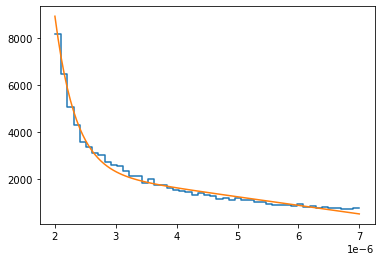

In [15]:
import histlite as hl

def decay_fit(x,A,t,m,b):
    return A*np.exp(-(x)/t)+m*x+b

h1 = hl.hist(delays_8, bins = np.linspace(2e-6,7e-6))
popt, pcov = curve_fit(decay_fit, xdata = h1.centers[0], ydata = h1.values, p0 = [8000,2.2e-6,-1e6,1000])

x = np.linspace(2e-6,7e-6,100)
hl.plot1d(h1)
plt.plot(x, decay_fit(x,popt[0], popt[1],popt[2],popt[3]))
print(f"Fitted Lifetime: {popt[1]:.4} pm {pcov[1][1]:.4}")
print(popt)

Fitted Lifetime: 3.383e-07 pm 3.04e-16
[ 2.43295595e+06  3.38274678e-07 -3.63864454e+08  4.95699041e+03]


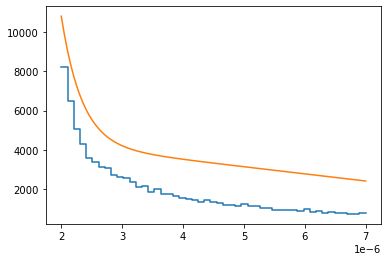

In [16]:
values_corr = h1.values + (-1.691e-6 * np.array(h1.centers[0]) + 1875.5)

popt2, pcov2 = curve_fit(decay_fit, xdata = h1.centers[0], ydata = values_corr, p0 = [8000,2.2e-6,-1e6,1000])

hl.plot1d(h1)
plt.plot(x, decay_fit(x,popt2[0], popt2[1],popt2[2],popt2[3]))
print(f"Fitted Lifetime: {popt2[1]:.4} pm {pcov2[1][1]:.4}")
print(popt2)

In [17]:
ch1_delay = pd.read_csv("Efficiency_Ch1_final.txt", sep = "	")

In [18]:
times = ch1_delay.Ch1_time2 - ch1_delay.Ch1_time1

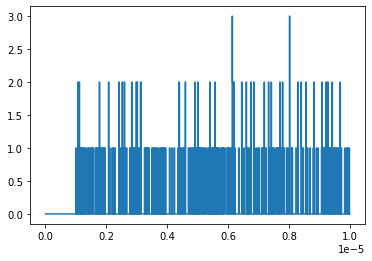

In [19]:
h2 = hl.hist(times, bins = np.linspace(0,1e-5,1000))
hl.plot1d(h2)

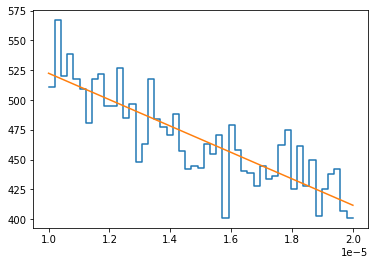

In [20]:
h_11_2 = hl.hist(delays_11, bins = np.linspace(1e-5,2e-5))
popt_11_2, pcov_11_2 = np.polyfit(h_11_2.centers[0], h_11_2.values, deg = 1, cov = True)

x_11_2 = np.linspace(1e-5,2e-5,1000)
hl.plot1d(h_11_2)
plt.plot(x_11_2, x_11_2*popt_11_2[0] + popt_11_2[1])

Fitted Lifetime: 2.196e-06 pm 1.88e-14
[1.61956588e+04 2.19554527e-06]


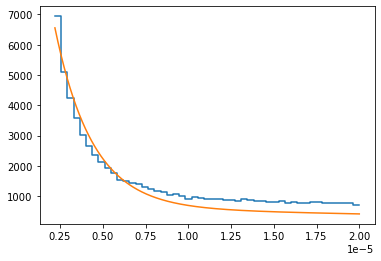

In [21]:
h_11 = hl.hist(delays_11, bins = np.linspace(2.2e-6,2e-5))

def decay_fit_2(x,A,t):
    return A*np.exp(-(x)/t) + (popt_11_2[0]*x+popt_11_2[1])

y_corr = h_11.values
popt_11, pcov_11 = curve_fit(decay_fit_2, xdata = h_11.centers[0], ydata = y_corr, p0 = [10000,2.2e-6])

# values_corr = h_11.values + (-1.691e-6 * np.array(h_11.centers[0]) + 1875.5)
popt_11_3, pcov_11_3 = curve_fit(decay_fit_2, xdata = h_11.centers[0], ydata = values_corr, p0 = [10000,2.2e-6])

x_11 = np.linspace(2.2e-6,2e-5,1000)
hl.plot1d(h_11)
plt.plot(x_11, decay_fit_2(x_11,popt_11[0], popt_11[1]))
print(f"Fitted Lifetime: {popt_11[1]:.4} pm {pcov_11[1][1]:.4}")
# plt.yscale('log')
print(popt_11)

In [22]:
h_11 = hl.hist(delays_11, bins = np.linspace(2.2e-6,2e-5))

In [104]:
len(delays_final.values)

386411

In [24]:
h_fin_2 = hl.hist(delays_final.values, bins = np.linspace(2.2e-6,2e-5))


## CUTS AND CALLIBRATION
We expect wide range of initial trigger values since there is trigger set and we expect muon amplitudes to range a decent bit. However, since there is a narrow time and amplitude cutoff for the second trigger, these are most often muon decay pulses and thus far more narrowly distributed. A cut to apply would be to remove the pulses that fall in the overlap of about over 0.15-0.2V as these could include muon muon events and not just muon decay events. Additionally since there is a slight slope in the log scale to the uncorrelated counts we should apply that callibration feature here as well. Since there is a nearly perfect callibration of the digitizer clock, slope of 1.000004, we will not be adjusting the data but rather will include this in our error analysis.

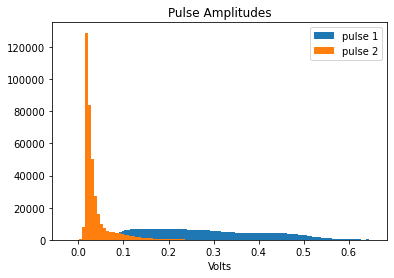

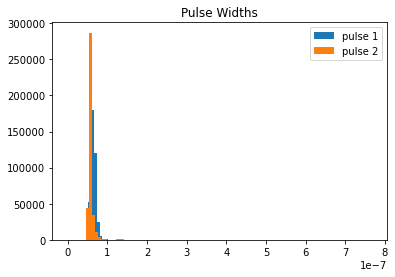

In [25]:
#inspecting the pulse heights and widths
plt.hist(pulse_a_height, bins = 100, label = 'pulse 1')
plt.hist(pulse_b_height, bins = 100, label = 'pulse 2')
plt.legend()
plt.title('Pulse Amplitudes')
plt.xlabel('Volts')
plt.show()

plt.hist(pulse_a_width, bins = 100, label = 'pulse 1')
plt.hist(pulse_b_width, bins = 100, label = 'pulse 2')
plt.legend()
plt.title('Pulse Widths')
plt.show()

In [105]:
keep = pulse_b_height < .1
delays_cut_final = delays_final[keep]


(array([68508., 82206., 28434., 19049., 15628., 11846.,  8119.,  5925.,
         5133.,  4605.,  3898.,  3628.,  3332.,  3037.,  2816.,  2543.,
         2431.,  2340.,  2237.,  2108.,  1987.,  1859.,  1825.,  1769.,
         1714.,  1564.,  1543.,  1424.,  1545.,  1458.,  1397.,  1370.,
         1381.,  1320.,  1244.,  1231.,  1172.,  1220.,  1206.,  1133.,
         1134.,  1101.,  1086.,  1049.,  1060.,  1048.,   995.,   955.,
         1022.,   954.,   934.,  1000.,   950.,   919.,   946.,  1015.,
          916.,   903.,   928.,   978.,   897.,   917.,   874.,   846.,
          926.,   870.,   868.,   890.,   845.,   959.,   845.,   838.,
          847.,   814.,   900.,   856.,   862.,   791.,   825.,   863.,
          860.,   802.,   806.,   865.,   820.,   829.,   789.,   873.,
          820.,   816.,   827.,   786.,   843.,   757.,   776.,   817.,
          789.,   781.,   755.,   413.]),
 array([1.000000e-06, 1.191240e-06, 1.382480e-06, 1.573720e-06,
        1.764960e-06, 1.956200

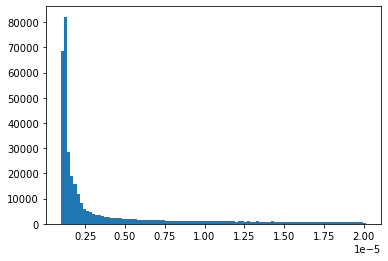

In [106]:
# plt.hist(delays_final, bins = 100)
plt.hist(delays_cut_final, bins = 100)

[-2.1762000e+07 -6.2336049e+02]


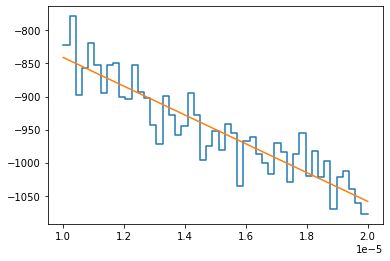

In [107]:
h_11_2 = hl.hist(delays_cut_final.values, bins = np.linspace(1e-5,2e-5))
y_cut_final = h_11_2.values - (-1.691e-6 * h_11_2.centers[0] + 1875.566)
h_11_2_fin = hl.Hist(np.linspace(1e-5,2e-5), y_cut_final)
popt_11_2_fin, pcov_11_2_fin = np.polyfit(h_11_2_fin.centers[0], h_11_2_fin.values, deg = 1, cov = True)

x_11_2_fin = np.linspace(1e-5,2e-5,1000)
hl.plot1d(h_11_2_fin)
plt.plot(x_11_2_fin, x_11_2_fin*popt_11_2_fin[0] + popt_11_2_fin[1])
print(popt_11_2_fin)

## FITTING THE DATA AND GETTING THE LIEFTIME

No handles with labels found to put in legend.


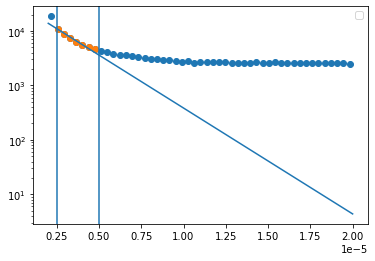

2.2325050651491687e-06


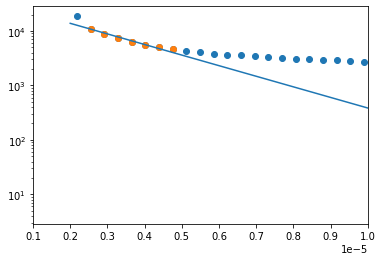

In [116]:
#using the logscale plot we know we want to be fitting from 
h_11_fin_2 = hl.hist(delays_cut_final.values, bins = np.linspace(2e-6,2e-5))

def decay_fit_2(x,A,t):
    return A*np.exp(-(x)/t) 

y_11_corr = h_11_fin_2.values - (popt_11_2_fin[0]*np.linspace(2e-6,2e-5, 49)  + popt_11_2_fin[1])
h_11_fin_2_corr = hl.Hist(np.linspace(2e-6,2e-5), y_11_corr, weights = np.sqrt(1/y_11_corr))


total_x = h_11_fin_2_corr.centers[0]
total_y = h_11_fin_2_corr.values

index = (total_x > .25e-5) & (total_x < .5e-5)

final_x = np.array(total_x[index])
final_y = np.array(total_y[index])

err_cut_1 = np.sqrt((0.431e-6*final_x)**2 + 12.079**2) 
err_cut_2 = np.sqrt((pcov_11_2_fin[0][0]*final_x)**2 + pcov_11_2_fin[1][1]**2)
err_tot = np.sqrt(np.sqrt(1/final_y)**2 + err_cut_1**2 + err_cut_2**2)
popt_final, pcov_final = curve_fit(decay_fit_2, xdata = final_x, ydata = final_y, p0 = [10000,2e-6], sigma = err_tot)


plt.scatter(total_x, total_y)
plt.scatter(final_x, final_y)
plt.plot(np.linspace(2e-6,2e-5), decay_fit_2(np.linspace(2e-6,2e-5), popt_final[0], popt_final[1]))
plt.yscale('log')
plt.axvline(0.25e-5)
plt.axvline(0.5e-5)
plt.legend()
plt.show()
plt.scatter(total_x, total_y)
plt.scatter(final_x, final_y)
plt.plot(np.linspace(2e-6,2e-5), decay_fit_2(np.linspace(2e-6,2e-5), popt_final[0], popt_final[1]))
plt.xlim(1e-6,1e-5)
plt.yscale('log')
print(popt_final[1])

#add chi-square estimates

Fitted Lifetime: 2.233e-06 pm 1.743e-08


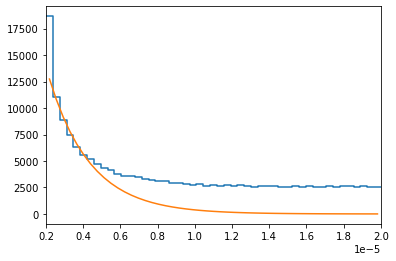

In [117]:
hl.plot1d(h_11_fin_2_corr)
plt.plot(total_x, decay_fit_2(total_x, popt_final[0], popt_final[1]))
print(f"Fitted Lifetime: {popt_final[1]:.4} pm {np.sqrt(pcov[1][1]):.4}")
plt.xlim(2e-6,2e-5)
hl.LineStyle(errorbars = True)

## ERROR ANALYSIS

### Muon Capture
Some negatively charged muons get captured by the carbon nuclei in the oil scintillator. \
$\lambda_{combined} = \lambda_{decay} + \lambda_{captured}$ --> free decaying $\mu^-$ also decay with this rate

Since we assume that half of the observed decays are from $\mu^-$ we can reduce the given formula to $A$

Error -->
$\tau_T - \tau_E = \frac{\mu_d^-+2\mu_c^-}{2\mu_d^-(\mu_d^-+\mu_c^-)}$

### Error Propogation
Sources of Error:
- negelecting muon capture --> systematic
- the errors in the callibration fits that are used to make cuts --> systematic
- the time resolution of the digitizer --> systematic
- sample error since muon flux is a poisson distribution  --> statistical
- fit errors: covariance matrix --> systematic

The second and third are added in as weights to the fit because they affect the data the fit is supposed to fit too and hence bins with smaller errors should be weighted higher in a fit. Since these are all independent errors the total uncertainty estimate can be found by adding these errors in quadruture. Since we do not care about the value of the entire fit but rather just the value of lifetime it is not necessary to account for the error of the amplitude value in the fit since this value does not impact our final results. 

In [118]:
mu_d = 1/(2.2e-6)
mu_c = 1/(26e-6)
err_mu_c = (mu_d + 2*mu_c)/(2*mu_d*(mu_d+mu_c))
print(err_mu_c)
err_time = 2.96e-8
err_fit = np.sqrt(pcov[1][1])
err = np.sqrt(err_mu_c**2 + err_time**2 + err_fit**2)
lifetime = popt_final[1]
print(f"Fitted Lifetime: {lifetime:.4} pm {err:.4}\nKnown Lifetime: 2.197e-06")
print(f"Does the fitted value agree with the nominal value? {np.abs(popt_final[1] - 2.197e-6) <= err}")

1.1858156028368796e-06
Fitted Lifetime: 2.233e-06 pm 1.186e-06
Known Lifetime: 2.197e-06
Does the fitted value agree with the nominal value? True


## FERMI COUPLING CONSTANT
From Thomson's Modern Particle Physics Chapter 11 Section 5: \
$\frac{1}{\tau_\mu} = \frac{{G_F}^2{m_\mu}^5}{192\pi^3} \implies G_F = \sqrt{\frac{192\pi^3}{\tau_\mu{m_\mu}^5}}$ \
We know the mass of the muon to be 105.658 $\pm$ .23e-5 Mev --> pdg
For the purposes of simplification as is done in Thomson we will assume no uncertainty on the muon mass. This calculation can be done with that but then we must also account for the uncertainty in the nominal value of G_F

With error propogation we get: \
$\sigma_{G_F} = \sqrt{(\sigma_\tau^2*(\frac{192\pi^3}{4\tau^3m^5})}$

Since the formula is working in natural units we need to convert lifetime to natural units as well so dividing by hbar. Getting the known value for G_F from Thomson as well.

In [119]:
m = 105.658e6**5
adj_life = (lifetime/6.582119569e-16)
adj_err = (err/6.582119569e-16)
G = np.sqrt((192*(np.pi**3))/(adj_life*m))

err_G = np.sqrt(adj_err**2 * (192*np.pi**3)/(4*m*adj_life**3))
print(f"Calculated G_F = {G*(1e9)**2:.4} pm {err_G*(1e9)**2:.4} GeV^-2")
print(f"Nominal Value for G_F: 1.166e−5 GeV^−2")
print(f"Does the fitted value agree with the nominal value? {np.abs(G*(1e9)**2 - 1.166e-5) <= err_G*(1e9)**2}")

Calculated G_F = 1.155e-05 pm 3.067e-06 GeV^-2
Nominal Value for G_F: 1.166e−5 GeV^−2
Does the fitted value agree with the nominal value? True


## SIMULATIONS
$P(r)dr = 1$  \
$t = -\tau ln(r)$ \
$P(t)dt = 1*\frac{dt}{dr} = $ 

In [138]:
np.random.rand()

0.928400802989653

C:\Users\shrey\AppData\Local\Temp/ipykernel_13900/168199009.py:13: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  t = np.array([gen_t(i) for i in n])


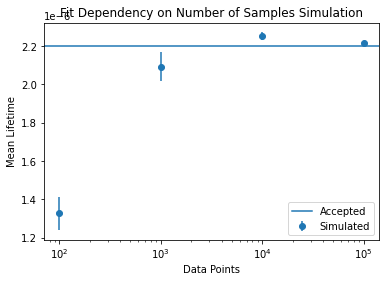

In [165]:
def gen_t(n):
    t = np.array([])
    for i in range(n):
        t = np.append(t, -2.197e-6*np.log(np.random.rand()))
    return t

def lifetime(t):
    hist = hl.hist(t, bins = np.linspace(1e-6,2e-5))
    popt, pcov = curve_fit(decay_fit_2, hist.centers[0], hist.values, p0 = [len(t),2e-6])
    return [popt[1], pcov[1][1]]

n = np.array([100,1000,10000, 100000])
t = np.array([gen_t(i) for i in n])
sols = np.array([lifetime(a) for a in t])
life = [i[0] for i in sols]
err = [np.sqrt(i[1]) for i in sols]
plt.errorbar(n,life, yerr = err, fmt="o", label = 'Simulated')
plt.xscale('log')
plt.axhline(2.197e-6, label = 'Accepted')
plt.xlabel('Data Points')
plt.ylabel('Mean Lifetime')
plt.title('Fit Dependency on Number of Samples Simulation')
plt.legend()